<a href="https://colab.research.google.com/github/GENTLEW1ND/Python/blob/main/Face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Work Flow:
1. Dataset
2. Image Processing
3. Train Test Split
4. Convolutional Neural Network (CNN)
5. Evaluation

In [7]:
!pip install kaggle

In [8]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
# Kaggle api
!kaggle datasets download omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [11]:
# Extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [12]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies **

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [14]:
with_mask_files = os.listdir('/content/data/with_mask') # this listdir create a list which contains all the file names in the folder.
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2514.jpg', 'with_mask_3712.jpg', 'with_mask_1058.jpg', 'with_mask_2873.jpg', 'with_mask_1939.jpg']
['with_mask_1532.jpg', 'with_mask_827.jpg', 'with_mask_2500.jpg', 'with_mask_1262.jpg', 'with_mask_2541.jpg']


In [15]:
without_mask_files = os.listdir('/content/data/without_mask') # this listdir create a list which contains all the file names in the folder.
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_644.jpg', 'without_mask_2641.jpg', 'without_mask_1719.jpg', 'without_mask_916.jpg', 'without_mask_2940.jpg']
['without_mask_503.jpg', 'without_mask_3472.jpg', 'without_mask_3157.jpg', 'without_mask_827.jpg', 'without_mask_469.jpg']


In [16]:
print("Number of with mask images ",len(with_mask_files))
print("Number of without mask images ",len(without_mask_files))

Number of with mask images  3725
Number of without mask images  3828


**Creating the Labels for the class of images.**

with mask -> 1

without mask -> 0

In [17]:
# Create the labels
with_mask_labels = [1]*len(with_mask_files)

without_mask_labels = [0]*len(without_mask_files)

In [18]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [19]:
labels = with_mask_labels + without_mask_labels # it will combine the two list but in the case of numpy the plus operator will add the two numpy array or matrics

In [20]:
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the images **

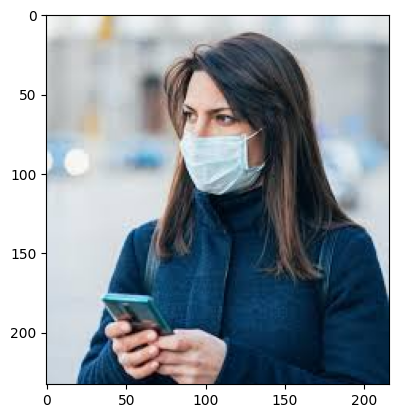

In [21]:
# Displaying the with mask image
img = mpimg.imread("/content/data/with_mask/with_mask_3055.jpg")
imgplot = plt.imshow(img)

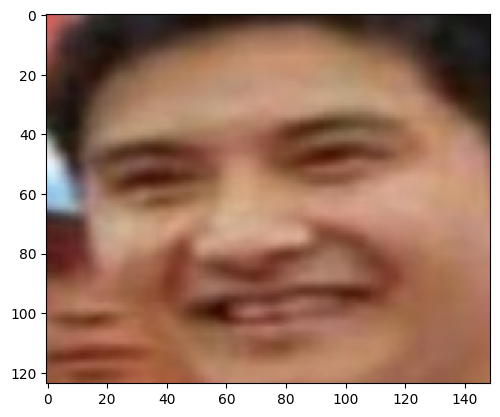

In [22]:
# Displaying the without mask image
img = mpimg.imread("/content/data/without_mask/without_mask_551.jpg")
imgplot = plt.imshow(img)

**Image Processing**

1. Resize the image
2. Convert the image into numpy arrays

In [23]:
# Converting the images into numpy arrays

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file) # returns /content/data/with_mask/with_mask2214.jpg
  image = image.resize((128,128)) # resize the image
  image = image.convert('RGB') # making sure all the image is colored
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file) # returns /content/data/without_mask/without_mask2214.jpg
  image = image.resize((128,128)) # resize the image
  image = image.convert('RGB') # making sure all the image is colored
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [24]:
len(data)

7553

In [25]:
type(data)

list

array([[[40, 40, 42],
        [40, 40, 42],
        [40, 40, 42],
        ...,
        [38, 38, 40],
        [38, 38, 40],
        [38, 38, 40]],

       [[40, 40, 42],
        [40, 40, 42],
        [40, 40, 42],
        ...,
        [38, 38, 40],
        [38, 38, 40],
        [38, 38, 40]],

       [[40, 40, 42],
        [40, 40, 42],
        [40, 40, 42],
        ...,
        [38, 38, 40],
        [38, 38, 40],
        [38, 38, 40]],

       ...,

       [[26, 36, 40],
        [37, 49, 52],
        [55, 67, 70],
        ...,
        [31, 32, 34],
        [31, 32, 34],
        [30, 31, 33]],

       [[50, 66, 69],
        [57, 73, 76],
        [58, 73, 76],
        ...,
        [31, 32, 34],
        [31, 32, 34],
        [30, 31, 33]],

       [[55, 71, 77],
        [52, 69, 73],
        [53, 68, 73],
        ...,
        [32, 32, 33],
        [33, 33, 34],
        [29, 30, 31]]], dtype=uint8)
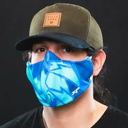

In [26]:
data[0]

In [27]:
type(data[0])

numpy.ndarray

In [28]:
data[0].shape

(128, 128, 3)

In [29]:
# Converting the imae list and label to numpy array
X = np.array(data)
Y = np.array(labels)

In [30]:
type(X)

numpy.ndarray

In [31]:
type(Y)

numpy.ndarray

In [32]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


**Train Test Split**

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [35]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [36]:
X_train_scaled[0]

array([[[0.03921569, 0.03529412, 0.01568627],
        [0.03921569, 0.03529412, 0.01568627],
        [0.04705882, 0.03921569, 0.01960784],
        ...,
        [0.04313725, 0.04705882, 0.03921569],
        [0.05490196, 0.0627451 , 0.05882353],
        [0.05882353, 0.07058824, 0.06666667]],

       [[0.03529412, 0.03529412, 0.01568627],
        [0.03921569, 0.03529412, 0.01568627],
        [0.04705882, 0.03921569, 0.01960784],
        ...,
        [0.03921569, 0.04313725, 0.03529412],
        [0.05098039, 0.05882353, 0.05490196],
        [0.05490196, 0.06666667, 0.0627451 ]],

       [[0.03529412, 0.03137255, 0.01176471],
        [0.03921569, 0.03137255, 0.01176471],
        [0.04705882, 0.03921569, 0.01960784],
        ...,
        [0.03529412, 0.03529412, 0.03137255],
        [0.04313725, 0.05098039, 0.04705882],
        [0.04705882, 0.05882353, 0.05490196]],

       ...,

       [[0.10588235, 0.0627451 , 0.04705882],
        [0.09803922, 0.05490196, 0.03921569],
        [0.07843137, 0

**Building a Convolutional Nerual Network(CNN)**

In [37]:
import tensorflow as tf
from tensorflow import keras

In [38]:
num_of_classes = 2

model = keras.Sequential()
# the other way of adding layers to your Neural Network
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
# Compile the neural network
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['acc'])

In [40]:
# Training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 147s 849ms/step - acc: 0.6616 - loss: 0.7521 - val_acc: 0.8810 - val_loss: 0.2767
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 140s 827ms/step - acc: 0.8670 - loss: 0.3325 - val_acc: 0.9107 - val_loss: 0.2606
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 144s 836ms/step - acc: 0.8847 - loss: 0.2851 - val_acc: 0.9223 - val_loss: 0.1874
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 204s 848ms/step - acc: 0.9007 - loss: 0.2460 - val_acc: 0.9273 - val_loss: 0.1826
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 195s 806ms/step - acc: 0.9031 - loss: 0.2288 - val_acc: 0.9322 - val_loss: 0.1821


Model Evaluation

In [42]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print("Test Accuracy = ", accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 234ms/step - acc: 0.9062 - loss: 0.2053
Test Accuracy =  0.9179351329803467


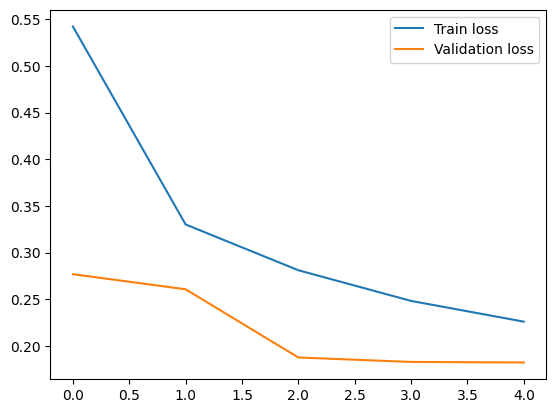

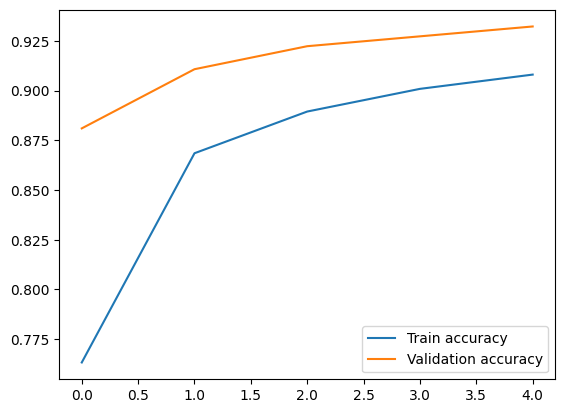

In [43]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='Train loss')
plt.plot(h.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='Train accuracy')
plt.plot(h.history['val_acc'], label='Validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Enter the path of the image to be predicted :/content/imagewithmask.jpg


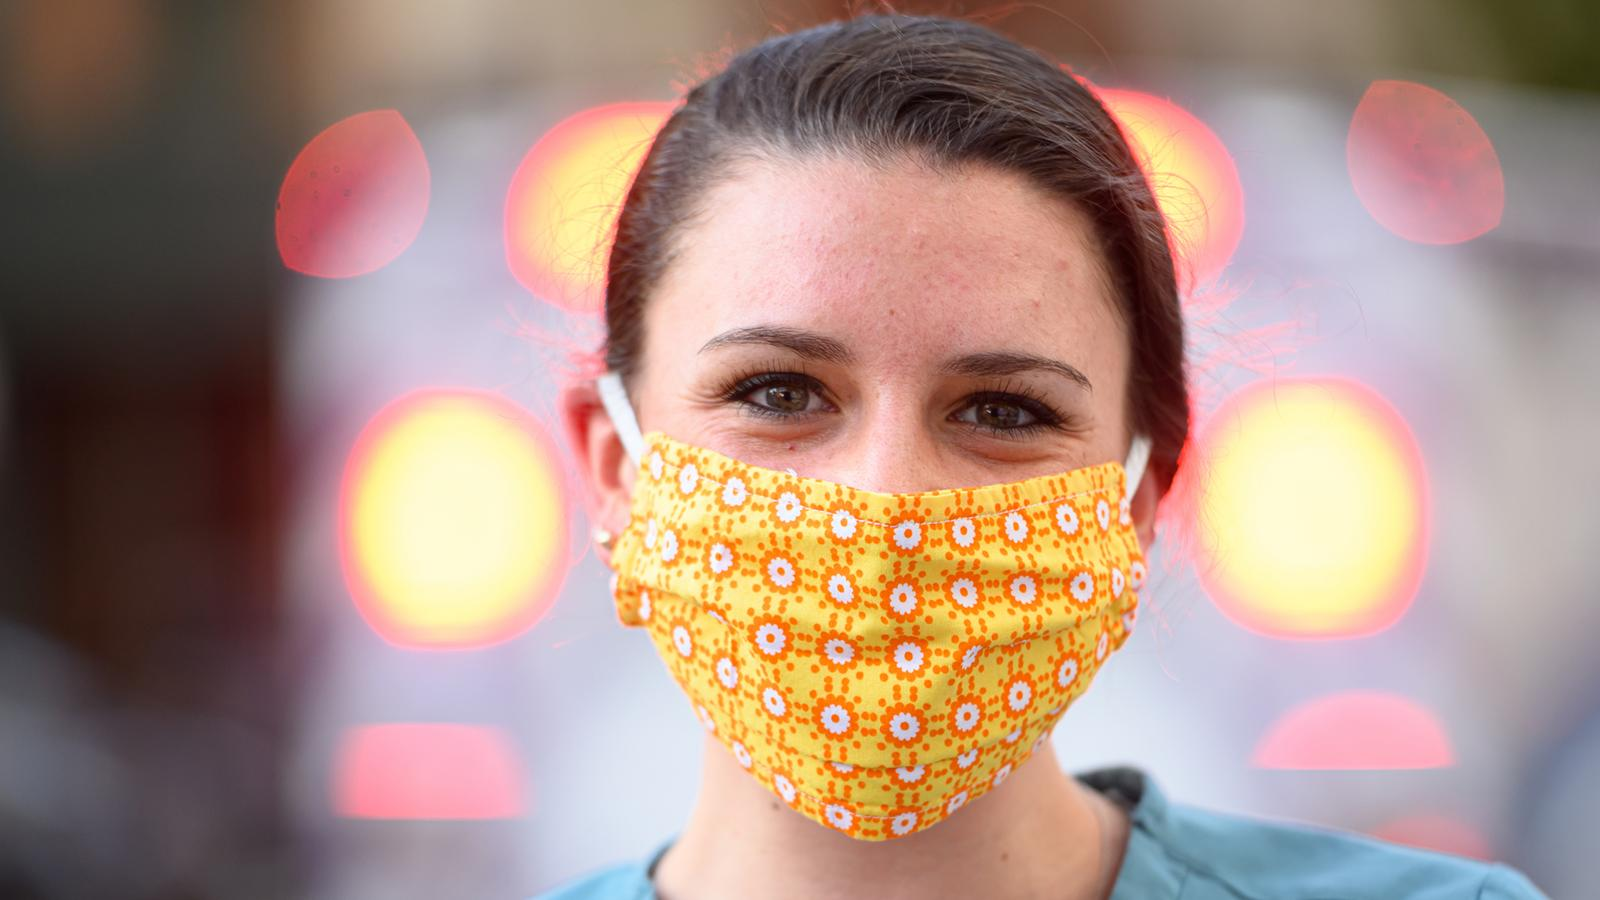

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
[[0.00527005 0.9113993 ]]
1
The person in the image is wearing a mask


In [45]:
input_image_path = input("Enter the path of the image to be predicted :")

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshape = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction = model.predict(input_image_reshape)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('Teh preson in the image is not wearing a mask')